In [2]:
import PIL
from math import *
from PIL import Image
from numpy import asarray
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from skimage import io 
import skimage
import skimage.transform
import random 
import imageio
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import pickle
train = 'train'
test = 'test'
pos,neg='Positive','Negative'
types = [pos,neg]
categories = [train, test]

In [3]:
path="C:/Users/ganga/Deep Learning/Untitled Folder/Concrete Crack Images for Classification"
img_height=20
img_width=20
all_files = glob(path + '/*/*.jpg')
y=[]
data=[]
random.shuffle(all_files)
for i in range(len(all_files)):
    img = io.imread(all_files[i]) #img = Image.open()
    gray_image = skimage.color.rgb2gray(img)
    resized=skimage.transform.resize(gray_image,(img_height,img_width))
    numpydata = asarray(resized).ravel() 
    data.append(numpydata)
    typ,file=all_files[i].replace(path+'\\','').split('\\')
    y.append(types.index(typ))
    if i%1000==0:
        print(i)    
data=np.array(data)
y

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,


In [4]:
y.count(0)

20000

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
size=38000
x_train=np.array(data[:size])
y_train=np.array(y[:size])
x_test=np.array(data[size:])
y_test=np.array(y[size:])
#train_test_split(data,y,test_size=0.2,random_state=42)


In [6]:
len(y_test)

2000

In [7]:
x_test.shape

(2000, 400)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)#floor(sqrt(len(all_files))))
knn.fit(data,y)#(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
pickle.dump(knn,open('ConcreteCrackModel1.pkl', 'wb'))

In [10]:
y_pred=knn.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
report_train=classification_report(y_train,knn.predict(x_train))
report_test =classification_report(y_test,y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1002
           1       0.86      1.00      0.92       998

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [12]:
print(report_train)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     18998
           1       0.85      1.00      0.92     19002

    accuracy                           0.91     38000
   macro avg       0.93      0.91      0.91     38000
weighted avg       0.93      0.91      0.91     38000



Negative
Negative


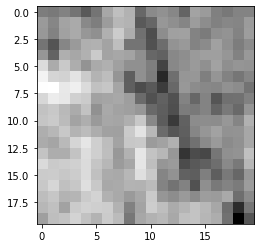

In [13]:
_i=46
import matplotlib.pyplot as plt
# img=open()
plt.imshow(x_test[_i].reshape(img_width ,img_width),cmap=plt.get_cmap('gray'))
# for _i in range(100):
#     if(types[int(knn.predict([x_test[_i]]))]!=types[int(y_test[_i])]):
#         print(_i)
#         break
print(types[int(knn.predict([x_test[_i]]))])
print(types[int(y_test[_i])])

In [14]:
model=pickle.load(open('ConcreteCrackModel1.pkl','rb'))

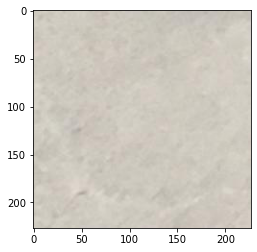

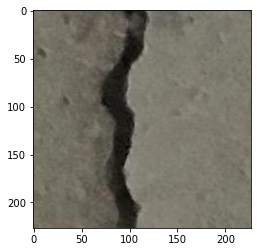

In [16]:
plt.imshow(io.imread(cracks))

# Live Data

In [17]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
global resize
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image 
        gray_image = skimage.color.rgb2gray(frame)
        resized=skimage.transform.resize(gray_image,(img_height,img_width))
        
        if(model.predict([asarray(resized).ravel()])):
            cv2.imwrite('Crack.jpeg', frame)
            display_handle.update(Image(data=cracks))
        else:        
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))

        
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\ganga\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\ganga\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-17-c65f678b67f7>", line 23, in view
  File "C:\Users\ganga\anaconda3\lib\site-packages\skimage\color\colorconv.py", line 769, in rgb2gray
    if rgb.ndim == 2:
AttributeError: 'NoneType' object has no attribute 'ndim'
